In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
generating_data_dir = "generating_data"
transactions_xgb = pd.read_csv(os.path.join(generating_data_dir,'transactions_xgb.csv'))

### Generating Dataset

In [3]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW', 'NB_CARD_NO', 'NB_CARD_TYPE', 'NB_EMAIL_DOMAIN', 'NB_IP_ADDRESS',
       'NB_PHONE_NO']

X_train = transactions_xgb[input_features].copy()
y_train = transactions_xgb[output_feature].copy()
cols = list(X_train.columns)

In [4]:
original_ds_features = list(set(transactions_xgb.columns.to_list())-set(input_features))
original_ds = transactions_xgb[original_ds_features]
original_ds['TX_AMOUNT'] = transactions_xgb['TX_AMOUNT']

C:\Users\Ashley He\AppData\Local\Temp\ipykernel_6508\3656122646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_ds['TX_AMOUNT'] = transactions_xgb['TX_AMOUNT']


In [5]:
original_ds

,CUSTOMER_ID,TX_FRAUD,PHONE_NO,CARD_TYPE,IP_ADDRESS,SME_ID,TX_TIME_SECONDS,TRANSACTION_ID,EMAIL_DOMAIN,CARD_NO,TX_DATETIME,TX_TIME_DAYS,TX_AMOUNT
0,6160,0,+1-684-043-2108x883,VISA 16 digit,93.113.29.137,1602,17,0,smith.com,4807386282223131022,2018-04-01 00:00:17,0,31.83
1,3305,0,+1-435-580-2880x863,JCB 16 digit,213.50.161.243,3563,119,1,yahoo.com,501840408188,2018-04-01 00:01:59,0,66.21
2,6170,0,601-185-2008,JCB 15 digit,124.3.159.126,3552,141,2,yahoo.com,2404180621851474,2018-04-01 00:02:21,0,25.17
3,8347,0,+1-287-916-9827x7383,JCB 15 digit,140.252.121.231,344,225,3,gmail.com,38977833740025,2018-04-01 00:03:45,0,3.09
4,2,0,+1-485-590-9776x58236,Diners Club / Carte Blanche,77.42.198.63,3958,476,4,wiggins.com,4934421761046,2018-04-01 00:07:56,0,146.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,1987,0,+1-436-476-9444x0036,JCB 16 digit,134.142.234.159,324,15811016,1773913,hughes.info,3528716375376223,2018-09-30 23:56:56,182,34.53
1781238,3133,0,(405)305-0411x8725,American Express,20.231.206.121,3491,15811027,1773914,yahoo.com,676151026702,2018-09-30 23:57:07,182,55.83
1781239,3007,0,200-540-6960x0861,VISA 16 digit,182.201.70.209,3664,15811031,1773915,torres.net,4264830832653,2018-09-30 23:57:11,182,65.94
1781240,6244,0,425-178-0631x3652,Maestro,177.38.229.155,3137,15811064,1773916,gmail.com,213165348311865,2018-09-30 23:57:44,182,16.99


### Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# For plotting
%matplotlib inline

#### Plot 1: Histogram of transaction amounts and time of day

In [7]:
%%capture
distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = original_ds[original_ds.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = original_ds[original_ds.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

# Analysis 1: The transaction amount distribution allows us to see the general range 
# within which most transactions fall. If we see many high-amount transactions, 
# this could be a possible indication of fraud.

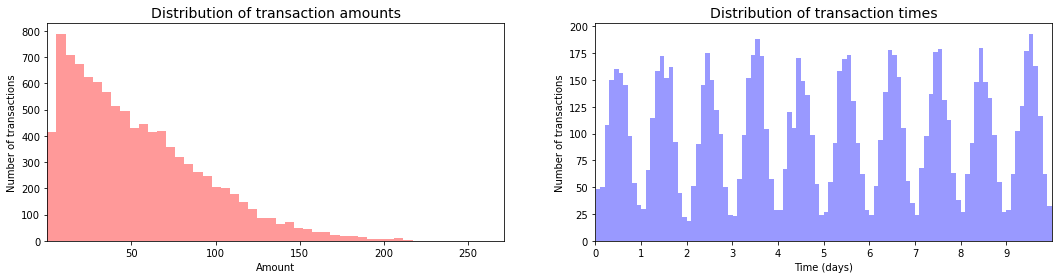

In [8]:
distribution_amount_times_fig

#### Plot 2: Bar plot of card types

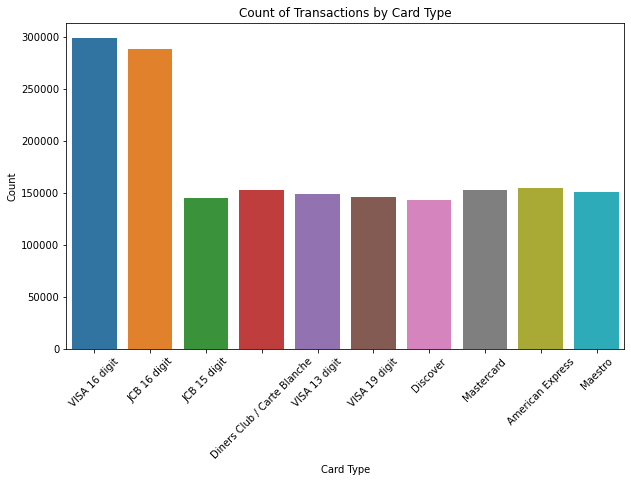

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='CARD_TYPE', data=original_ds)
plt.title('Count of Transactions by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analysis 2: The count of transactions by card type can help us understand which card types 
# are more commonly used. If a less common card type suddenly sees a lot of transactions, 
# it could be a red flag for potential fraud.

#### Plot 3: Heatmap of correlation matrix

In [10]:
 y_train

0          0
1          0
2          0
3          0
4          0
          ..
1781237    0
1781238    0
1781239    0
1781240    0
1781241    0
Name: TX_FRAUD, Length: 1781242, dtype: int64

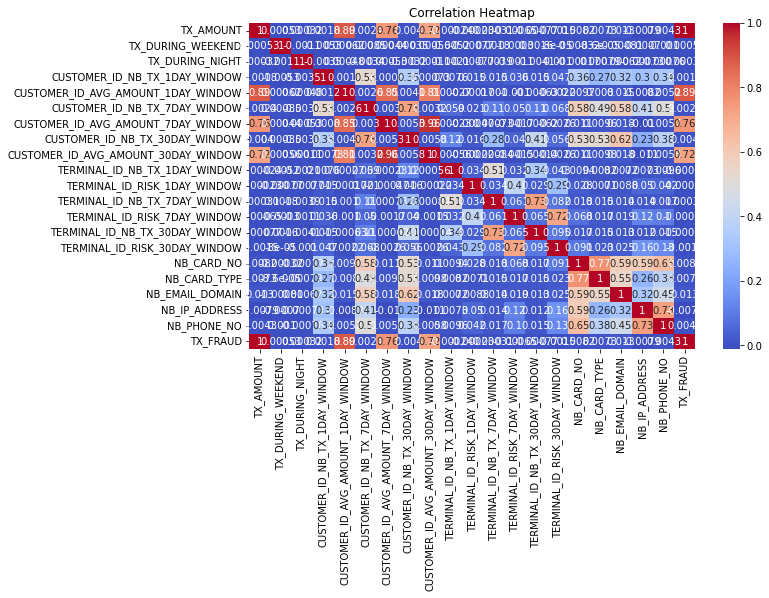

In [11]:
Xy_train = X_train.copy()
Xy_train['TX_FRAUD'] = transactions_xgb['TX_AMOUNT']
plt.figure(figsize=(10,6))
sns.heatmap(Xy_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analysis 3: The correlation heatmap gives us an overview of how the different numeric variables 
# in our dataset are related to each other. For instance, if the transaction amount is highly correlated 
# with fraud, we might want to give this variable more importance in our predictive model.

### Divide the dataset

In [12]:
# extract out transactions for train, validation, and test data
train_data_ratio = 0.7 # fraction of data to use in training set
valid_data_ratio = 0.2 # fraction of data to use in validation set
n_train = int(transactions_xgb.shape[0]*train_data_ratio)
n_valid = int(transactions_xgb.shape[0]*(train_data_ratio+valid_data_ratio))
train_ids = transactions_xgb.index.values[:n_train]
valid_ids = transactions_xgb.index.values[n_train:n_valid]
test_ids = transactions_xgb.index.values[n_valid:]
idxT = X_train.index[:n_train]
idxV = X_train.index[n_train:n_valid]
idxP = X_train.index[n_valid:]

print("Training, validation, and test data fraction are {}, {}, and {:.1f}, respectively".format(train_data_ratio, valid_data_ratio, 1-train_data_ratio-valid_data_ratio))

get_fraud_frac = lambda series: 100 * sum(series)/len(series)
print("Percentage of fraud transactions for train data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[:n_train])))
print("Percentage of fraud transactions for validation data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[n_train:n_valid])))
print("Percentage of fraud transactions for test data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[n_valid:])))
print("Percentage of fraud transactions for all data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD)))

Training, validation, and test data fraction are 0.7, 0.2, and 0.1, respectively
Percentage of fraud transactions for train data: 1.167323912937125
Percentage of fraud transactions for validation data: 1.1666030405784735
Percentage of fraud transactions for test data: 0.9992982456140351
Percentage of fraud transactions for all data: 1.1503770964304683


### After transformation

In [13]:
# Training Dataset
X_train

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
0,31.83,1,1,1.0,31.830000,1.0,31.830000,1.0,31.830000,0.0,0.0,0.0,0.0,0.0,0.000000,10,6,15,3,3
1,66.21,1,1,1.0,66.210000,1.0,66.210000,1.0,66.210000,0.0,0.0,0.0,0.0,0.0,0.000000,5,3,17,2,7
2,25.17,1,1,1.0,25.170000,1.0,25.170000,1.0,25.170000,0.0,0.0,0.0,0.0,0.0,0.000000,12,7,19,6,7
3,3.09,1,1,1.0,3.090000,1.0,3.090000,1.0,3.090000,0.0,0.0,0.0,0.0,0.0,0.000000,5,4,7,1,2
4,146.00,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.000000,6,4,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,34.53,1,0,1.0,34.530000,5.0,61.300000,41.0,56.118293,4.0,0.0,28.0,0.0,105.0,0.000000,10,6,11,8,5
1781238,55.83,1,0,2.0,46.775000,19.0,53.013158,49.0,51.493673,4.0,0.0,17.0,0.0,77.0,0.025974,10,6,15,3,9
1781239,65.94,1,0,3.0,48.753333,12.0,69.355833,41.0,80.544878,4.0,0.0,17.0,0.0,61.0,0.000000,15,7,20,4,3
1781240,16.99,1,0,7.0,42.022857,11.0,43.820909,38.0,50.416316,2.0,0.0,11.0,0.0,63.0,0.000000,8,6,20,2,5


## Model evaluation and feature importance extraction

In [14]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score,roc_curve

import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import warnings


In [15]:
print("XGBoost version:", xgb.__version__)

best_iteration = 836 # from the training result
if True:
    clf_best = xgb.XGBClassifier(
        n_estimators=best_iteration,
        max_depth=12, 
            learning_rate=0.02, 
            subsample=0.8,
            colsample_bytree=0.4, 
            missing=-1, 
            eval_metric='auc',
            # USE CPU
            #nthread=4,
            #tree_method='hist' 
            # USE GPU
            tree_method='gpu_hist'
        )

XGBoost version: 1.7.5


In [16]:
clf_best.fit(X_train.loc[idxT,cols], y_train.loc[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train.loc[idxV])],verbose=best_iteration)

[0]	validation_0-auc:0.67113
[835]	validation_0-auc:0.83408


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=-1, monotone_constraints=None,
              n_estimators=836, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
def metrics_sklearn(y_valid, y_pred_):
    
    """The model scores the results of the validation set"""

    accuracy = accuracy_score(y_valid, y_pred_)
    print('Accuracy：%.2f%%' % (accuracy * 100))

    precision = precision_score(y_valid, y_pred_)
    print('Precision：%.2f%%' % (precision * 100))

    recall = recall_score(y_valid, y_pred_)
    print('Recall：%.2f%%' % (recall * 100))

    f1 = f1_score(y_valid, y_pred_)
    print('F1：%.2f%%' % (f1 * 100))

    auc = roc_auc_score(y_valid, y_pred_)
    print('AUC：%.2f%%' % (auc * 100))

    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_)
    ks = max(abs(fpr - tpr))
    print('KS：%.2f%%' % (ks * 100))


In [18]:
def feature_importance_selected(clf_model):
    
    """Model feature importance extraction and preservation"""
    
    feature_importance = clf_model.get_booster().get_fscore()
    feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    feature_ipt = pd.DataFrame(feature_importance, columns=['features', 'importance'])
    #feature_ipt.to_csv('feature_importance.csv', index=False)

    plot_importance(clf_model)
    plt.show()


Accuracy：99.24%
Precision：100.00%
Recall：34.89%
F1：51.73%
AUC：67.44%
KS：34.89%


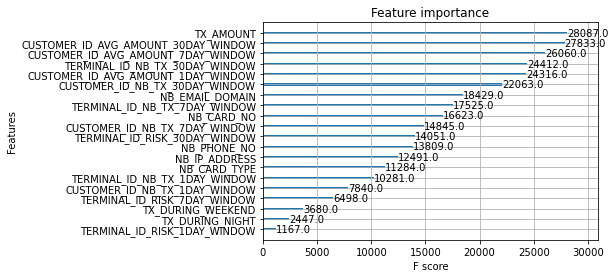

In [19]:
y_vld_pred = clf_best.predict(X_train.loc[idxV,cols])
y_vld_real = y_train.loc[idxV]
metrics_sklearn(y_vld_real, y_vld_pred)
feature_importance_selected(clf_best)

**1. accuracy_score:**
    The accuracy_score function from the sklearn.metrics module calculates the accuracy of a classification model by comparing the predicted labels with the true labels. It returns the ratio of correct predictions to the total number of samples.
    
**2. precision_score:**
    The precision_score function calculates the precision of a model, which is the ratio of true positives to the sum of true positives and false positives. It represents the model's ability to correctly identify positive instances.
    
**3. recall_score:**
    The recall_score function calculates the recall (also known as sensitivity or true positive rate) of a model, which is the ratio of true positives to the sum of true positives and false negatives. It represents the model's ability to identify all positive instances.

**4. f1_score:**
    The f1_score function calculates the F1 score, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both false positives and false negatives.
    
**5. roc_auc_score:**
    The roc_auc_score function computes the Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) score, which is a measure of the model's ability to distinguish between classes. It is commonly used for binary classification problems.
    
**6. ks:**
   KS, (Kolmogorov-Smirnov) is another evaluation metric commonly used in binary classification tasks. It measures the maximum difference between the cumulative distributions of the predicted probabilities for the positive and negative classes.

## Model Demonstration

In [20]:
# Test Dataset
X_test = X_train.loc[idxP,cols]
y_test = y_train.loc[idxP]

In [21]:
X_test

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
1603117,72.35,0,0,2.0,52.455000,9.0,41.074444,38.0,38.188947,5.0,0.000000,17.0,0.000000,65.0,0.000000,13,7,18,1,3
1603118,55.90,0,0,2.0,75.930000,7.0,73.054286,38.0,61.229211,4.0,0.000000,23.0,0.000000,81.0,0.000000,10,6,11,4,10
1603119,128.22,0,0,4.0,122.367500,19.0,78.597895,76.0,62.207632,5.0,0.400000,20.0,0.150000,78.0,0.076923,14,9,31,4,11
1603120,0.73,0,0,1.0,0.730000,12.0,60.041667,46.0,51.543913,6.0,0.166667,21.0,0.047619,85.0,0.094118,9,7,14,2,5
1603121,30.53,0,0,2.0,75.640000,11.0,96.516364,51.0,110.295098,2.0,0.000000,25.0,0.000000,99.0,0.020202,18,9,16,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,34.53,1,0,1.0,34.530000,5.0,61.300000,41.0,56.118293,4.0,0.000000,28.0,0.000000,105.0,0.000000,10,6,11,8,5
1781238,55.83,1,0,2.0,46.775000,19.0,53.013158,49.0,51.493673,4.0,0.000000,17.0,0.000000,77.0,0.025974,10,6,15,3,9
1781239,65.94,1,0,3.0,48.753333,12.0,69.355833,41.0,80.544878,4.0,0.000000,17.0,0.000000,61.0,0.000000,15,7,20,4,3
1781240,16.99,1,0,7.0,42.022857,11.0,43.820909,38.0,50.416316,2.0,0.000000,11.0,0.000000,63.0,0.000000,8,6,20,2,5


In [22]:
from random import sample

Demo_normal = 1686597
# Demo_normal = sample(y_test[y_test==0].index.to_list(),1)[0]
print('Demo_normal index:',Demo_normal)

Demo_fraud = 1620049
# Demo_fraud = sample(y_test[y_test==1].index.to_list(),1)[0]
print('Demo_fraud index:',Demo_fraud)

# Demo_pred_error = 1658330

Demo_normal index: 1686597
Demo_fraud index: 1620049


In [23]:
# Give an original view of the transaction before transformed
get_Demo_CUSTOMER_ID = lambda x: int(original_ds[original_ds.index == x]['CUSTOMER_ID'].values)

print('The original Transaction Table of the customer in the Normal Demo:')
display(original_ds[original_ds.CUSTOMER_ID == get_Demo_CUSTOMER_ID(Demo_normal)])

print('\n\nThe original Transaction Table of the customer in the Fraud Demo:')
display(original_ds[original_ds.CUSTOMER_ID == get_Demo_CUSTOMER_ID(Demo_fraud)])


The original Transaction Table of the customer in the Normal Demo:


,CUSTOMER_ID,TX_FRAUD,PHONE_NO,CARD_TYPE,IP_ADDRESS,SME_ID,TX_TIME_SECONDS,TRANSACTION_ID,EMAIL_DOMAIN,CARD_NO,TX_DATETIME,TX_TIME_DAYS,TX_AMOUNT
21766,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,1738,201259,21725,bartlett.com,4516775414010325899,2018-04-03 07:54:19,2,73.85
32751,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,2910,295913,32698,smith.biz,4516775414010325899,2018-04-04 10:11:53,3,149.78
35094,4515,0,+1-891-574-0292x9889,VISA 16 digit,217.75.239.131,648,307824,35038,smith.biz,639095958547,2018-04-04 13:30:24,3,121.86
38585,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,891,336418,38520,smith.biz,4516775414010325899,2018-04-04 21:26:58,3,39.00
54521,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,1145,481217,54431,smith.biz,4516775414010325899,2018-04-06 13:40:17,5,11.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737135,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,2468,15419203,1729831,smith.biz,4516775414010325899,2018-09-26 11:06:43,178,34.71
1744729,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,891,15493882,1737415,smith.biz,4516775414010325899,2018-09-27 07:51:22,179,86.15
1749533,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,46,15519149,1742218,smith.biz,4516775414010325899,2018-09-27 14:52:29,179,83.46
1763998,4515,0,+1-891-574-0292x9889,JCB 16 digit,217.75.239.131,115,15666659,1756679,smith.biz,4516775414010325899,2018-09-29 07:50:59,181,35.17




The original Transaction Table of the customer in the Fraud Demo:


,CUSTOMER_ID,TX_FRAUD,PHONE_NO,CARD_TYPE,IP_ADDRESS,SME_ID,TX_TIME_SECONDS,TRANSACTION_ID,EMAIL_DOMAIN,CARD_NO,TX_DATETIME,TX_TIME_DAYS,TX_AMOUNT
1490582,10087,1,335-014-9519x928,Mastercard,8.92.20.169,1696,20027,1780146,gmail.com,3539650316980453,2018-09-01 05:33:47,0,82.40
1490591,10087,1,335-014-9519x928,VISA 16 digit,8.92.20.169,1131,20153,1780147,villegas-miller.com,4640590371062993803,2018-09-01 05:35:53,0,87.93
1495463,10087,1,335-014-9519x928,VISA 16 digit,8.92.20.169,1398,49543,1780169,gmail.com,3573538714098670,2018-09-01 13:45:43,0,99.82
1495590,10087,1,661-192-2554x12568,Mastercard,56.171.58.78,435,50251,1780170,gmail.com,3539650316980453,2018-09-01 13:57:31,0,117.49
1497271,10087,1,1889004605,Diners Club / Carte Blanche,8.92.20.169,416,60478,1780177,gmail.com,371121870757619,2018-09-01 16:47:58,0,146.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679763,10087,1,648-085-5279,Discover,82.228.182.126,761,1685833,1781129,yahoo.com,30059056637291,2018-09-20 12:17:13,19,78.23
1680661,10087,1,001-523-059-1656x57705,JCB 15 digit,76.163.185.2,555,1690295,1781131,gmail.com,6011827039416987,2018-09-20 13:31:35,19,34.02
1681618,10087,1,990-425-3154,American Express,8.92.20.169,3099,1695671,1781133,hotmail.com,4595600249845215,2018-09-20 15:01:11,19,100.12
1682210,10087,1,+1-794-333-7209,Mastercard,1.193.159.60,2473,1699386,1781137,miller.biz,4623937787490830,2018-09-20 16:03:06,19,116.03


In [24]:
# Show the comparison of the transfromed trasaction between the Demo_normal and Demo_fraud
comparison = pd.concat([X_test.loc[[Demo_normal]].T,X_test.loc[[Demo_fraud]].T], axis=1)
comparison.columns = (['Demo_normal','Demo_fraud'])
comparison

,Demo_normal,Demo_fraud
TX_AMOUNT,20.8400,50.640000
TX_DURING_WEEKEND,0.0000,0.000000
TX_DURING_NIGHT,0.0000,0.000000
CUSTOMER_ID_NB_TX_1DAY_WINDOW,2.0000,8.000000
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,70.5350,86.195000
CUSTOMER_ID_NB_TX_7DAY_WINDOW,6.0000,24.000000
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,68.8750,86.413750
CUSTOMER_ID_NB_TX_30DAY_WINDOW,25.0000,63.000000
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,90.9676,91.882857
TERMINAL_ID_NB_TX_1DAY_WINDOW,1.0000,3.000000


In [25]:
def demo(n):
    y_pred = clf_best.predict(X_test.loc[[n]])[0]
    y_pred_proba = clf_best.predict_proba(X_test.loc[[n]])[0][1]
    y_real = y_test[[n]].values[0]
    print('y_pred：', y_pred)
    print('y_real：', y_real)
    print('y_pred_proba：', y_pred_proba)
    return y_pred, y_real, y_pred_proba

In [26]:
def fraud_detection(y_pred, y_real, y_pred_proba):
    if y_test_pred == y_test_real:
        if y_test_pred == 0:
            if y_pred_proba < 0.3:
                print('The charge was authorized.')
            elif y_pred_proba < 0.5:
                print('We evaluated this charge as having elevated risk, and placed it in your manual review queue.')
        else:        
            print('Alert! We blocked this charge as too risky. \nWe reports payments as high risk when we believe they’re likely to be fraudulent. And the payments are blocked by default.')
    else:
        print('Sorry, something went wrong while evaluating this payment. We have been notified and we’ll look into this as soon as possible.')

In [27]:
y_test_pred, y_test_real, y_test_pred_proba = demo(Demo_fraud)

y_pred： 1
y_real： 1
y_pred_proba： 0.99920434


In [28]:
fraud_detection(y_test_pred, y_test_real, y_test_pred_proba)

Alert! We blocked this charge as too risky. 
We reports payments as high risk when we believe they’re likely to be fraudulent. And the payments are blocked by default.
